# Aula 01: Estatística Essencial para Ciência de Dados 📊

Olá, futuros Cientistas de Dados! Sejam muito bem-vindos à nossa primeira aula sobre estatítica, onde vamos desbravar juntos os conceitos fundamentais da estatística.

Pense na estatística como o feijão com arroz para de Cientista de Dados. Ela nos dá as ferramentas para transformar um mar de dados brutos em insights valiosos, tomar decisões mais inteligentes e construir modelos de Machine Learning que realmente funcionam.

Neste notebook, vamos explorar os conceitos essenciais de forma prática e direto ao ponto. Preparado? Então, vamos começar importando as bibliotecas que serão nossas parceiras nesta jornada!

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Deixando os plots mais bonitinhos
plt.style.use('fivethirtyeight')

In [3]:
# Importando os dados
df = pd.read_csv('data_science_kagle.csv')
# Você pode encontrar o mesmo dataset em https://www.kaggle.com/datasets/kaggle/kaggle-survey-2017
pd.set_option('display.max_columns', 250)

/var/folders/0p/cwmskvmj1kb401ljkv1q56x00000gn/T/ipykernel_24032/3280431242.py:2: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_science_kagle.csv')


## 🕵️‍♂️ Conhecendo os Dados: A Primeira Missão

Antes de qualquer análise, o primeiro passo é sempre "sentir" os dados. Quem são eles? O que representam? Vamos dar uma olhada nas primeiras linhas, verificar os tipos de dados e ver se há informações faltantes.

In [4]:
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,JobSkillImportancePython,JobSkillImportanceR,JobSkillImportanceSQL,JobSkillImportanceKaggleRanking,JobSkillImportanceMOOC,JobSkillImportanceVisualizations,JobSkillImportanceOtherSelect1,JobSkillImportanceOtherSelect2,JobSkillImportanceOtherSelect3,CoursePlatformSelect,HardwarePersonalProjectsSelect,TimeSpentStudying,ProveKnowledgeSelect,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,FirstTrainingSelect,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,MLSkillsSelect,MLTechniquesSelect,ParentsEducation,EmployerIndustry,EmployerSize,EmployerSizeChange,EmployerMLTime,EmployerSearchMethod,UniversityImportance,JobFunctionSelect,WorkHardwareSelect,WorkDataTypeSelect,WorkProductionFrequency,WorkDatasetSize,WorkAlgorithmsSelect,WorkToolsSelect,WorkToolsFrequencyAmazonML,WorkToolsFrequencyAWS,WorkToolsFrequencyAngoss,WorkToolsFrequencyC,WorkToolsFrequencyCloudera,WorkToolsFrequencyDataRobot,WorkToolsFrequencyFlume,WorkToolsFrequencyGCP,WorkToolsFrequencyHadoop,WorkToolsFrequencyIBMCognos,WorkToolsFrequencyIBMSPSSModeler,WorkToolsFrequencyIBMSPSSStatistics,WorkToolsFrequencyIBMWatson,WorkToolsFrequencyImpala,WorkToolsFrequencyJava,WorkToolsFrequencyJulia,WorkToolsFrequencyJupyter,WorkToolsFrequencyKNIMECommercial,WorkToolsFrequencyKNIMEFree,WorkToolsFrequencyMathematica,WorkToolsFrequencyMATLAB,WorkToolsFrequencyAzure,WorkToolsFrequencyExcel,WorkToolsFrequencyMicrosoftRServer,WorkToolsFrequencyMicrosoftSQL,WorkToolsFrequencyMinitab,WorkToolsFrequencyNoSQL,WorkToolsFrequencyOracle,WorkToolsFrequencyOrange,WorkToolsFrequencyPerl,WorkToolsFrequencyPython,WorkToolsFrequencyQlik,WorkToolsFrequencyR,WorkToolsFrequencyRapidMinerCommercial,WorkToolsFrequencyRapidMinerFree,WorkToolsFrequencySalfrod,WorkToolsFrequencySAPBusinessObjects,WorkToolsFrequencySASBase,WorkToolsFrequencySASEnterprise,WorkToolsFrequencySASJMP,WorkToolsFrequencySpark,WorkToolsFrequencySQL,WorkToolsFrequencyStan,WorkToolsFrequencyStatistica,WorkToolsFrequencyTableau,WorkToolsFrequencyTensorFlow,WorkToolsFrequencyTIBCO,WorkToolsFrequencyUnix,WorkToolsFrequencySelect1,WorkToolsFrequencySelect2,WorkFrequencySelect3,WorkMethodsSelect,WorkMethodsFrequencyA/B,WorkMethodsFrequencyAssociationRules,WorkMethodsFrequencyBayesian,WorkMethodsFrequencyCNNs,WorkMethodsFrequencyCollaborativeFiltering,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyEnsembleMethods,WorkMethodsFrequencyEvolutionaryApproaches,WorkMethodsFrequencyGANs,WorkMethodsFrequencyGBM,WorkMethodsFrequencyHMMs,WorkMethodsFrequencyKNN,WorkMethodsFrequencyLiftAnalysis,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyMLN,WorkMethodsFrequencyNaiveBayes,WorkMethodsFrequencyNLP,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyPrescripti

In [5]:
# Ajustando a coluna de Salário
df['CompensationAmount']=df['CompensationAmount'].str.replace(',','')
df['CompensationAmount']=df['CompensationAmount'].str.replace('-','')

In [6]:
# Importando a base de conversão de moedas
rates=pd.read_csv('conversionRates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df=df.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
df['Salary']=pd.to_numeric(df['CompensationAmount'])*df['exchangeRate']

In [8]:
# Selecionando apenas as colunas que vamos analisar
df_final = df[['GenderSelect','Country','Age','Salary']].dropna()
df_final.columns = ['Genero','Pais','Idade','Salario']

In [9]:
df_final.head()

,Genero,Pais,Idade,Salario
3,Male,United States,56.0,250000.0
8,Female,Australia,43.0,64184.8
9,Male,Russia,33.0,20882.4
11,Male,India,27.0,1483.9
14,Male,Taiwan,26.0,36634.4


In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4341 entries, 3 to 16700
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Genero   4341 non-null   object 
 1   Pais     4341 non-null   object 
 2   Idade    4341 non-null   float64
 3   Salario  4341 non-null   float64
dtypes: float64(2), object(2)
memory usage: 169.6+ KB


In [11]:
df_final.describe()

,Idade,Salario
count,4341.000000,4.341000e+03
mean,34.117945,6.639047e+06
std,9.571242,4.294985e+08
min,0.000000,0.000000e+00
25%,27.000000,2.032904e+04
50%,32.000000,5.381217e+04
75%,39.000000,9.566608e+04
max,100.000000,2.829740e+10


## 🧐 Tipos de Variáveis: A Identidade dos Nossos Dados

Todo dado tem uma identidade, um tipo. Entender essa classificação é crucial, pois ela define as análises e os gráficos que podemos utilizar. As variáveis são divididas em duas grandes famílias: **Qualitativas** e **Quantitativas**.

### Classificação Geral das Variáveis
<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img001.png' width='70%'>

Vamos detalhar cada tipo com exemplos do nosso dia a dia:


> ### Variáveis Qualitativas (Categóricas)
> Representam qualidades, categorias ou características que não podem ser medidas numericamente.
> 3. **Qualitativa Nominal**: As categorias não possuem uma ordem ou hierarquia lógica.
>   - *Exemplos*: Cor dos olhos (Azul, Verde, Castanho), cidade de nascimento, área de atuação (Dados, Web, Mobile).
> 4. **Qualitativa Ordinal**: As categorias possuem uma ordem ou hierarquia bem definida.
>   - *Exemplos*: Nível de escolaridade (Fundamental, Médio, Superior), classificação de um filme (Ruim, Bom, Excelente), senioridade de um cargo (Júnior, Pleno, Sênior).

> ### Variáveis Quantitativas (Numéricas)
> Representam quantidades, números que resultam de uma contagem ou medição.
> 1. **Quantitativa Discreta**: O valor é resultado de uma contagem, ou seja, são números inteiros e finitos. Pense em "quantos?".
>   - *Exemplos*: Número de filhos (0, 1, 2...), quantidade de computadores em uma sala, anos de experiência completos (5, 10, 15 anos).
> 2. **Quantitativa Contínua**: O valor é resultado de uma medição, podendo assumir qualquer valor dentro de um intervalo. Geralmente são números "quebrados".
>   - *Exemplos*: Altura de uma pessoa (1.75m), salário (R$ 4570,50), temperatura de um servidor (45.8 °C).


### Mão na Massa: Categorizando Variáveis
Às vezes, uma variável quantitativa contínua, como a `Salario`, pode ser mais útil se a transformarmos em categorias. Por exemplo, em vez de usar o valor exato do salário, podemos criar faixas como 'Até 5k', 'de 5k a 10k' e 'Acima de 10k'. Esse processo se chama **discretização** ou **binning**.

In [12]:
print('Salário mínima: ',df_final.Salario.min())
print('Salário máxima: ',df_final.Salario.max())

Salário mínima:  0.0
Salário máxima:  28297400000.0


In [13]:
classes =[df_final.Salario.min(), 50000, 100000, 150000, 250000, df_final.Salario.max()]

labels = ['1. Até $50K','2. Entre $50K e $100K', '3. Entre $100k e $150k', 
          '4. Entre $150k e $250k', '5. Mais que $250k']

df_final['Faixa Salario'] = pd.cut(df_final.Salario, bins=classes, labels=labels, include_lowest=True)
df_final[['Salario','Faixa Salario']].head()

,Salario,Faixa Salario
3,250000.0,4. Entre $150k e $250k
8,64184.8,2. Entre $50K e $100K
9,20882.4,1. Até $50K
11,1483.9,1. Até $50K
14,36634.4,1. Até $50K


In [14]:
print('Idade mínima: ',df_final.Idade.min())
print('Idade máxima: ',df_final.Idade.max())

Idade mínima:  0.0
Idade máxima:  100.0


In [15]:
classes =[df_final.Idade.min(), 25, 35, 50, df_final.Idade.max()]
labels = ['1. Até 25 anos','2. Entre 25 até 35 anos', '3. Entre 35 e 50 anos', '4. Mais que 50 Anos']

df_final['Faixa Idade'] = pd.cut(df_final.Idade, bins=classes, labels=labels, include_lowest=True)
df_final.head()

,Genero,Pais,Idade,Salario,Faixa Salario,Faixa Idade
3,Male,United States,56.0,250000.0,4. Entre $150k e $250k,4. Mais que 50 Anos
8,Female,Australia,43.0,64184.8,2. Entre $50K e $100K,3. Entre 35 e 50 anos
9,Male,Russia,33.0,20882.4,1. Até $50K,2. Entre 25 até 35 anos
11,Male,India,27.0,1483.9,1. Até $50K,2. Entre 25 até 35 anos
14,Male,Taiwan,26.0,36634.4,1. Até $50K,2. Entre 25 até 35 anos


#### Como definir o número de classes (ou faixas)?

Uma pergunta comum é: "Ok, mas quantas faixas eu crio?". Não há uma resposta única, mas uma técnica conhecida que pode nos dar um ponto de partida é a **Regra de Sturges**.

Ela nos ajuda a encontrar um número aproximado de classes ($k$) com base no número total de observações ($n$) que temos.

### Regra de Sturges
$$k = 1 + \frac{10}{3}\log_{10}n$$

Calma, não se assuste com a fórmula! O Python pode fazer essa conta para nós. O importante é entender a ideia: quanto mais dados você tem, mais classes (faixas) você pode criar para detalhar a distribuição.

In [16]:
# Exemplo prático com a Regra de Sturges
n = len(df_final)
k = 1 + (10/3) * np.log10(n)
k = int(k.round(0))
print(f'O número de classes sugerido pela Regra de Sturges é: {k}')

O número de classes sugerido pela Regra de Sturges é: 13


In [17]:
# Agora, vamos usar a função cut() do pandas para criar as faixas de renda
labels = [f'Faixa {i}' for i in range(1, k + 1)] # Cria os nomes das faixas

df_final['Faixa_Idade_2'] = pd.cut(
    x = df_final['Idade'],
    bins = k,
    labels = labels,
    include_lowest = True
)

df_final[['Idade', 'Faixa_Idade_2']].head()

,Idade,Faixa_Idade_2
3,56.0,Faixa 8
8,43.0,Faixa 6
9,33.0,Faixa 5
11,27.0,Faixa 4
14,26.0,Faixa 4


## 🎯 Medidas de Tendência Central: O Coração dos Dados

As medidas de tendência central são como o GPS dos seus dados. Elas nos dão um valor único que resume a "localização central" do conjunto de dados. As três medidas mais famosas são a Média, a Mediana e a Moda.

### Média Aritmética

A média é a medida mais conhecida. É simplesmente a soma de todos os valores dividida pelo número total de observações. Pense nela como o "ponto de equilíbrio" dos dados.

É representada por $\mu$ (letra grega 'mu') quando calculamos para toda a **população** e por $\bar{X}$ ("X barra") quando usamos uma **amostra**.

$$ \bar{X} = \frac{\sum_{i=1}^{n}X_i}{n} = \frac{X_1 + X_2 + ... + X_n}{n} $$

In [18]:
media_salario = df_final['Salario'].mean()
print(f'A média de Salário dos profissionais é: USD $ {media_salario:.2f} por ano')

A média de Salário dos profissionais é: USD $ 6639046.77 por ano


### Mediana

A mediana é o valor que está exatamente no meio de um conjunto de dados, **depois de ordená-los**. 50% dos dados estão abaixo da mediana e 50% estão acima.

**Por que a mediana é tão útil?**
Imagine que estamos calculando a renda média de uma pequena empresa. Se o CEO, com um salário altíssimo, entra na conta, a *média* pode disparar e não representar bem o salário da maioria dos funcionários. A *mediana*, por outro lado, não é afetada por esses valores extremos (os famosos *outliers*). Ela nos dá uma visão mais realista do centro dos dados em situações assim.

**Como calcular?**
1. Ordene todos os dados do menor para o maior.
2. Se o número de dados ($n$) for **ímpar**, a mediana é o valor que está na posição central.
3. Se o número de dados ($n$) for **par**, a mediana é a média dos dois valores centrais.

In [19]:
mediana_salario = df_final['Salario'].median()
print(f'A mediana do salario dos profissionais é: $ {mediana_salario:.2f}')

A mediana do salario dos profissionais é: $ 53812.17


### Moda

A mediana é o valor (ou valores) que mais aparecem no nosso conjuntos de dados.


In [20]:
moda = df_final.Idade.mode()
moda

0    28.0
Name: Idade, dtype: float64

#### Média vs. Mediana: Qual usar?
Se a média e a mediana são muito próximas, seus dados provavelmente têm uma distribuição simétrica. Se elas são muito diferentes, isso é um sinal de que existem valores extremos (outliers) puxando a média para um dos lados!

## 🌊 Medidas de Dispersão: Qual a "Cara" da Distribuição dos Dados?

Saber o centro é importante, mas não conta a história toda. Precisamos saber se os dados estão todos juntinhos ao redor da média ou muito espalhados. É para isso que servem as medidas de dispersão.

Observe a imagem abaixo. Todas as curvas têm a mesma média, mas suas "caras" (dispersão) são totalmente diferentes!

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

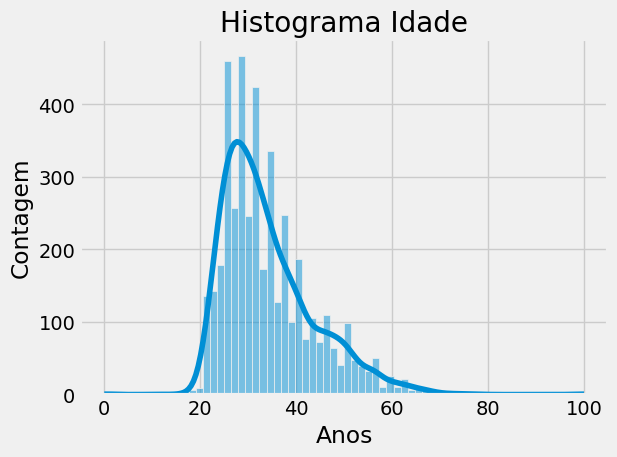

In [21]:
# Histograma da Idade

sns.histplot(df_final.Idade, kde=True)
plt.title('Histograma Idade')
plt.xlabel('Anos')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

In [22]:
df_final.Idade.mean()

np.float64(34.11794517392306)

In [23]:
df_final = df_final.query('Salario < 500000')

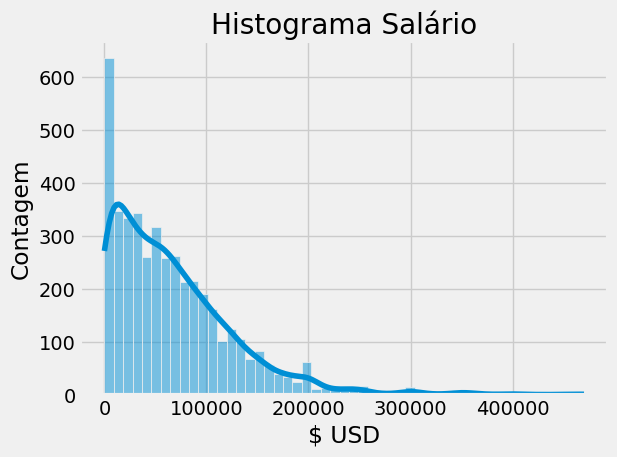

In [24]:
# Histograma da Salario

sns.histplot(data= df_final, x='Salario', kde=True)
plt.title('Histograma Salário')
plt.xlabel('$ USD')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

### Medidas Sepatrizes


Podemos falar que medidas separatrizes são aquelas que dividem nossos dados em determinadas posição. Um bom exemplo delas é a mediana, que divide nossos dados na metade.

Além da mediana, podemos calcular praticamente qualquer "fatia" do nosso dataset. 

**As medidas mais comuns são?**
- **Quartis**: dividem os dados em grupos de 25%.
- **Percentis**: dividem os dados em pedaços de 10%

In [26]:
df_final.Salario.quantile(0.5)

np.float64(53812.170000000006)

In [27]:
df_final.Salario.quantile(0.25)

np.float64(20328.528000000002)

In [28]:
percentis = [i/10 for i in range(1,10)]
percentis

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [29]:
df_final.Salario.quantile(percentis)

0.1      4686.0000
0.2     14947.1712
0.3     26627.5072
0.4     40000.0000
0.5     53812.1700
0.6     67913.7600
0.7     85000.0000
0.8    107624.3400
0.9    140000.0000
Name: Salario, dtype: float64

### Boxplot: conhecendo melhor seus dados

O boxplot é uma das ferramentas gráficas mais poderosas para visualizar a dispersão. Em uma única imagem, ele nos mostra a mediana, os quartis e os possíveis outliers.

**Como ler um Box Plot?**
- **A linha no meio da caixa** é a **Mediana** (ou segundo quartil, Q2), que divide os dados em 50%.
- **A base da caixa** é o **Primeiro Quartil (Q1)**. 25% dos dados estão abaixo deste valor.
- **O topo da caixa** é o **Terceiro Quartil (Q3)**. 75% dos dados estão abaixo deste valor.
- **A altura da caixa** representa o **Intervalo Interquartil (IIQ ou IQR)**, que contém os 50% centrais dos dados (IIQ = Q3 - Q1).
- **As "antenas" (ou whiskers)** se estendem até o valor mais distante que não seja considerado um outlier (geralmente $1.5 \times IIQ$ a partir da caixa).
- **Os pontos fora das antenas** são os **outliers**, valores atípicos que merecem uma investigação especial.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img005.png' width='65%'>

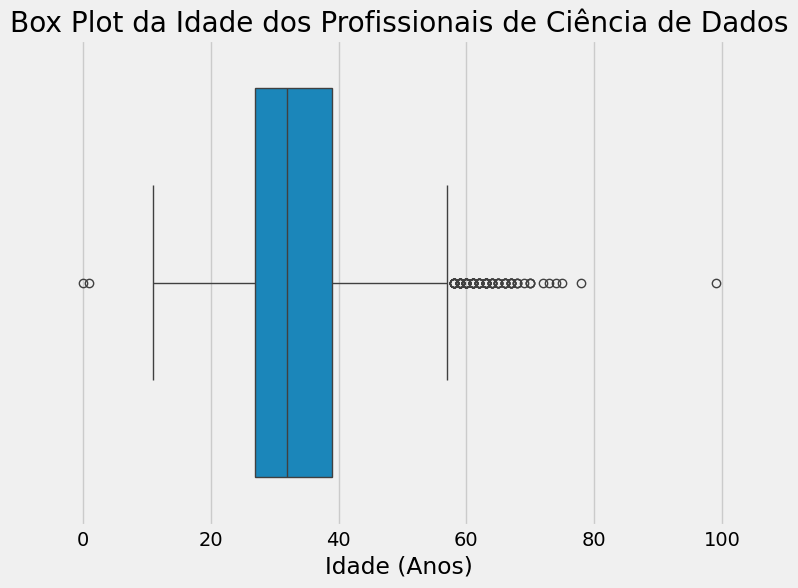

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_final['Idade'], orient='h')
plt.title('Box Plot da Idade dos Profissionais de Ciência de Dados')
plt.xlabel('Idade (Anos)')
plt.show()

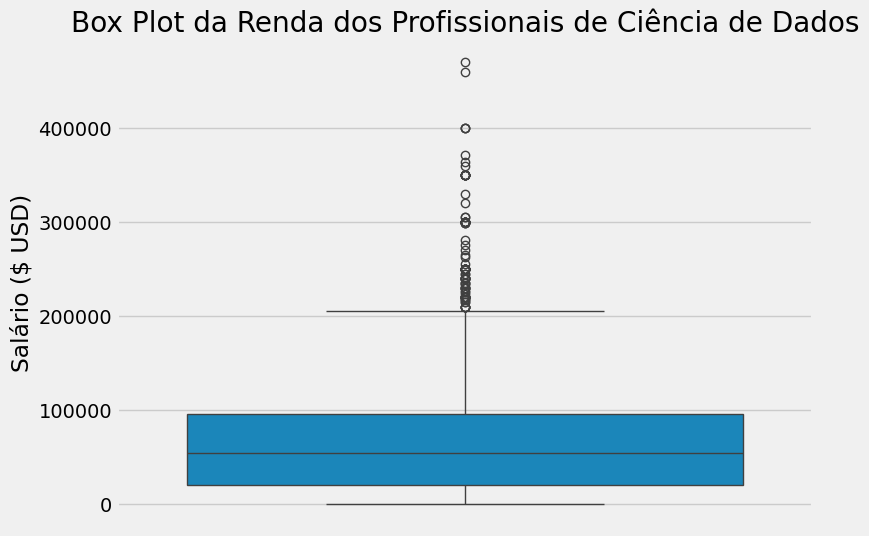

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_final['Salario'])
plt.title('Box Plot da Renda dos Profissionais de Ciência de Dados')
plt.ylabel('Salário ($ USD)')
plt.show()

#### Relação entre o Boxplot e a Distribuição

O formato do boxplot nos dá dicas sobre a simetria dos nossos dados. Uma caixa e antenas simétricas sugerem dados normalmente distribuídos. Se a caixa estiver "espremida" para baixo e a antena superior for longa, os dados são assimétricos à direita (como os dados de renda, geralmente).

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img006.png' width='80%'>

#### Explorando mais os dados com Boxplots

Podemos usar o boxplot para visualizar a diferença dos dados entre diferentes categorias do nosso dataset

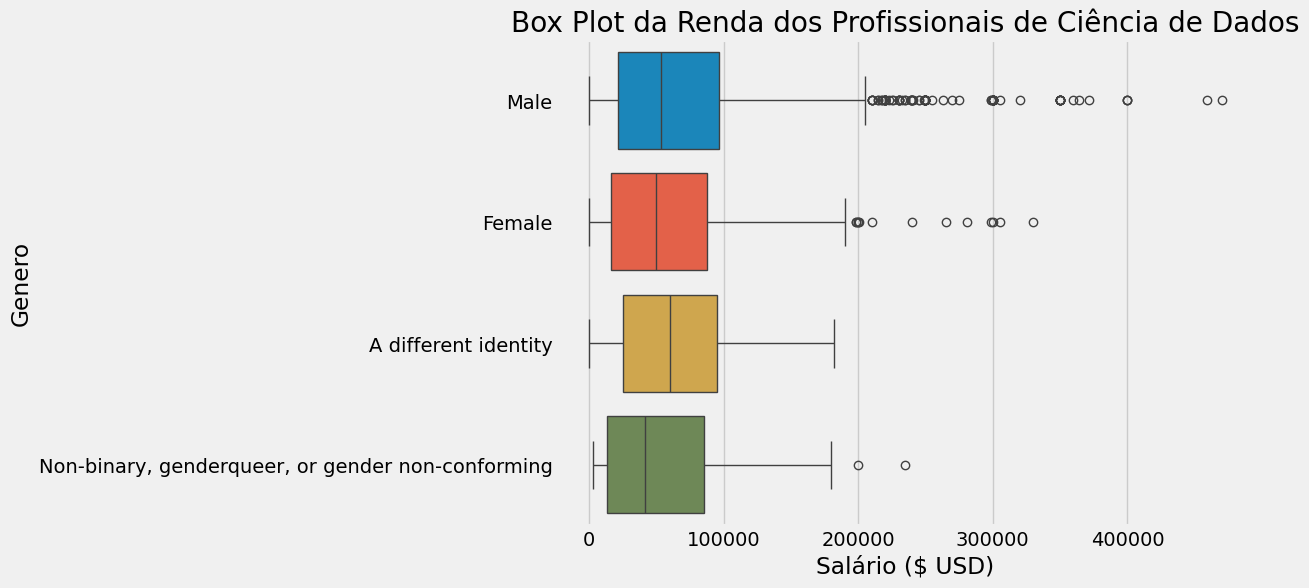

In [34]:
#### Relação entre o Boxplot e a Distribuição
plt.figure(figsize=(8, 6))
sns.boxplot(data = df_final, x='Salario', y='Genero', hue='Genero' ,orient='h')
plt.title('Box Plot da Renda dos Profissionais de Ciência de Dados')
plt.xlabel('Salário ($ USD)')
plt.show()

### Métricas Numéricas de Dispersão

#### Desvio Médio Absoluto

É uma primeira tentativa de medir a dispersão. Ele calcula a distância média de cada ponto de dado até a média do conjunto, ignorando o sinal (positivo ou negativo) da distância. É intuitivo, mas menos usado na prática do que a variância e o desvio padrão.

$$DM = \frac{1}{n}\sum_{i=1}^{n}|X_i - \bar{X}|$$

In [36]:
# Calculando o Desvio Médio Absoluto
media_salario = df_final['Salario'].mean()

desvio_medio_abs = (df_final['Salario'] - media_salario).abs()

desvio_medio_absoluto = desvio_medio_abs.mean()

print(f'O desvio médio absoluto da salario é: $ {desvio_medio_absoluto:.2f}')

O desvio médio absoluto da salario é: $ 44793.82


#### Variância

A variância é uma das medidas de dispersão mais importantes. Em vez de usar o módulo (valor absoluto) como o desvio médio, a variância eleva ao quadrado a distância de cada ponto até a média. 

**Por que elevar ao quadrado?**
1.  Elimina os sinais negativos.
2.  Dá um peso muito maior para os pontos que estão longe da média (os outliers). Isso faz com que a variância seja muito sensível a eles.

##### Variância populacional
Quando trabalhamos com uma população inteira (o que é muito difícil de acontecer) podemos usar a seguinte fórmula para calcular a variância

$$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$


##### Variância Amostral ($S^2$)
Quando trabalhamos com uma amostra de dados (o que é o caso em 99% das vezes em Data Science), usamos a variância amostral. A fórmula tem uma pequena, mas crucial, diferença: dividimos por $n-1$ em vez de $n$.

$$S^2 = \frac{1}{n-1}\sum_{i=1}^{n}(X_i - \bar{X})^2$$

> **Por que n-1?** Pense no $n-1$ como um "fator de correção". Usá-lo nos dá uma estimativa mais precisa e não enviesada da verdadeira variância da população da qual tiramos nossa amostra. É o que chamamos de Correção de Bessel.

In [37]:
# O pandas, por padrão, calcula a variância amostral (com n-1)
variancia_salario = df_final['Salario'].var()
print(f'A variância da salario é: {variancia_salario:.2f} (em $²)')

A variância da salario é: 3435409465.97 (em $²)


#### Desvio Padrão

Percebeu que a unidade da variância ficou estranha (R$²)? Isso torna a interpretação difícil. Como resolvemos isso? Simples: tirando a raiz quadrada da variância!

O **desvio padrão** é a medida de dispersão mais famosa e utilizada. Ele nos diz, em média, o quão distantes os pontos de dados estão da média, **na mesma unidade dos dados originais** (no nosso caso, em Reais). 

Um desvio padrão baixo significa que os dados estão agrupados perto da média. Um desvio padrão alto indica que os dados estão muito espalhados.

##### Desvio Padrão Amostral ($S$)
É simplesmente a raiz quadrada da variância amostral.
$$S = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(X_i - \bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$

In [38]:
# O pandas também calcula o desvio padrão amostral por padrão
desvio_padrao_salario = df_final['Salario'].std()
print(f'O desvio padrão da salario é: $ {desvio_padrao_salario:.2f}')

O desvio padrão da salario é: $ 58612.37


## Resumo da Ópera e Próximos Passos

Parabéns! Você chegou ao final da nossa primeira aula e já domina os conceitos essenciais da estatística descritiva:

- **Tipos de Variáveis**: A base para saber como tratar cada dado.
- **Medidas de Tendência Central (Média e Mediana)**: Para encontrar o "coração" dos seus dados.
- **Medidas de Dispersão (Variância e Desvio Padrão)**: Para entender o quão "espalhados" eles estão.
- **Visualização com Boxplots**: Para ter um raio-x completo da sua distribuição.

Com essas ferramentas, você já pode fazer uma análise exploratória de dados (EDA) muito mais rica e profissional. Na próxima aula, vamos mergulhar em distribuições de probabilidade, testes de hipótese e muito mais.

Até lá, pratique com outros datasets e continue explorando!